#About

This notebook presents example of using DataPopularityEstimator and DataAccessPredictor in DataPopulaity module

#Data requets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_path = 'Data/popularity-728days.xls'
data = pd.read_excel(data_path)

In [2]:
selection = (data['Nb Replicas']>=1)*(data['Storage']=='Disk')
data = data[selection]
data.irow(range(0,2))

/Users/mikhail91/.virtualenvs/rep_0_6_2/lib/python2.7/site-packages/pandas/computation/expressions.py:184: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


,Name,Configuration,ProcessingPass,FileType,Type,Creation-week,NbLFN,LFNSize,NbDisk,DiskSize,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08-MINBIAS-FIRST-14-NB/Stripping12d,MINIBIAS.DST,1,104591,67,0.317900,134,0.635799,...,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,BHADRON.DST,1,104607,227,0.649204,980,2.819260,...,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631


###Data columns requests

In [3]:
data.columns

Index([u'Name', u'Configuration', u'ProcessingPass', u'FileType', u'Type', u'Creation-week', u'NbLFN', u'LFNSize', u'NbDisk', u'DiskSize', u'NbTape', u'TapeSize', u'NbArchived', u'ArchivedSize', u'Nb Replicas', u'Nb ArchReps', u'Storage', u'FirstUsage', u'LastUsage', u'Now', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, ...], dtype='object')

#DataPopularityEstimator

###Train Data Popularity Estimator

In [4]:
from datapop import DataPopularityEstimator

estimator = DataPopularityEstimator(data=data, nb_of_weeks=104)

#Alternative way:
#estimator = DataPopularityEstimator(source_path=data_path, nb_of_weeks=104)

In [5]:
import rep

In [6]:
%%time
estimator.train()

KFold prediction using folds column
CPU times: user 19min 38s, sys: 33.6 s, total: 20min 12s
Wall time: 20min 13s


1

0.98516957676051653

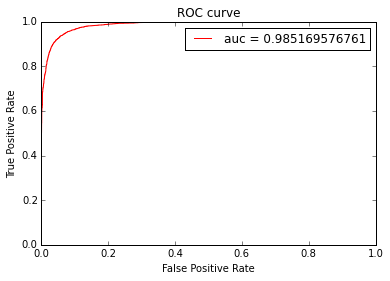

In [7]:
estimator.roc_curve()

In [8]:
estimator.train_report.irow(range(0,5))

,Name,Probability,Label
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.031359,0
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.705305,0
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.995783,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000776,0
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.991419,1


###Get Popularity

In [9]:
popularity = estimator.get_popularity()
popularity.irow(range(0,5))

,Name,Popularity,Label
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.005403,0
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.069879,0
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.437557,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000182,0
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.346582,1


###Cut Popularity

In [10]:
cut = estimator.popularity_cut_fpr(fpr_value=0.02)
cut

0.13928896991795806

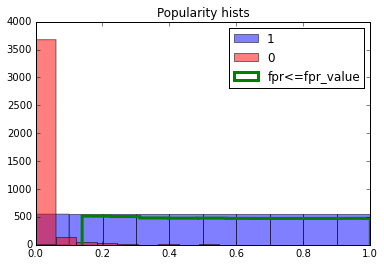

In [11]:
pop = estimator.get_popularity()['Popularity'].values
label = estimator.train_report['Label'].values

plt.hist(pop[label==1], color='b', alpha=0.5, label='1')
plt.hist(pop[label==0], color='r', alpha=0.5, label='0')
plt.hist(pop[pop>=cut], color='g', alpha=1, label='fpr<=fpr_value', histtype='step', linewidth=3)
plt.legend(loc='best')
plt.title('Popularity hists')
plt.show()

#DataAccessPredictor

The DataAccessPredictor uses Nadaraya-Watson method for the first smoothing of time series. 
Then, rolling mean method with an adaptive window is used for the second smoothing. 
Last points of the smoothed time series are used as predict values.

###Get prediction

In [12]:
from datapop import DataIntensityPredictor

predictor = DataIntensityPredictor(data=data, nb_of_weeks=104)

In [13]:
%%time
prediction = predictor.predict(zero_one_scale=True)

CPU times: user 1min 23s, sys: 12.8 s, total: 1min 36s
Wall time: 1min 34s


In [14]:
prediction.columns

Index([u'Name', u'Intensity', u'Std_error'], dtype='object')

In [15]:
prediction.irow(range(5))

,Name,Intensity,Std_error
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,2.707870e-03,0.012686
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,7.185918e-02,0.232858
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000000e+00,0.000000
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,3.359477e-04,0.000000
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,3.270906e-17,0.000000


###Get curve examples

1

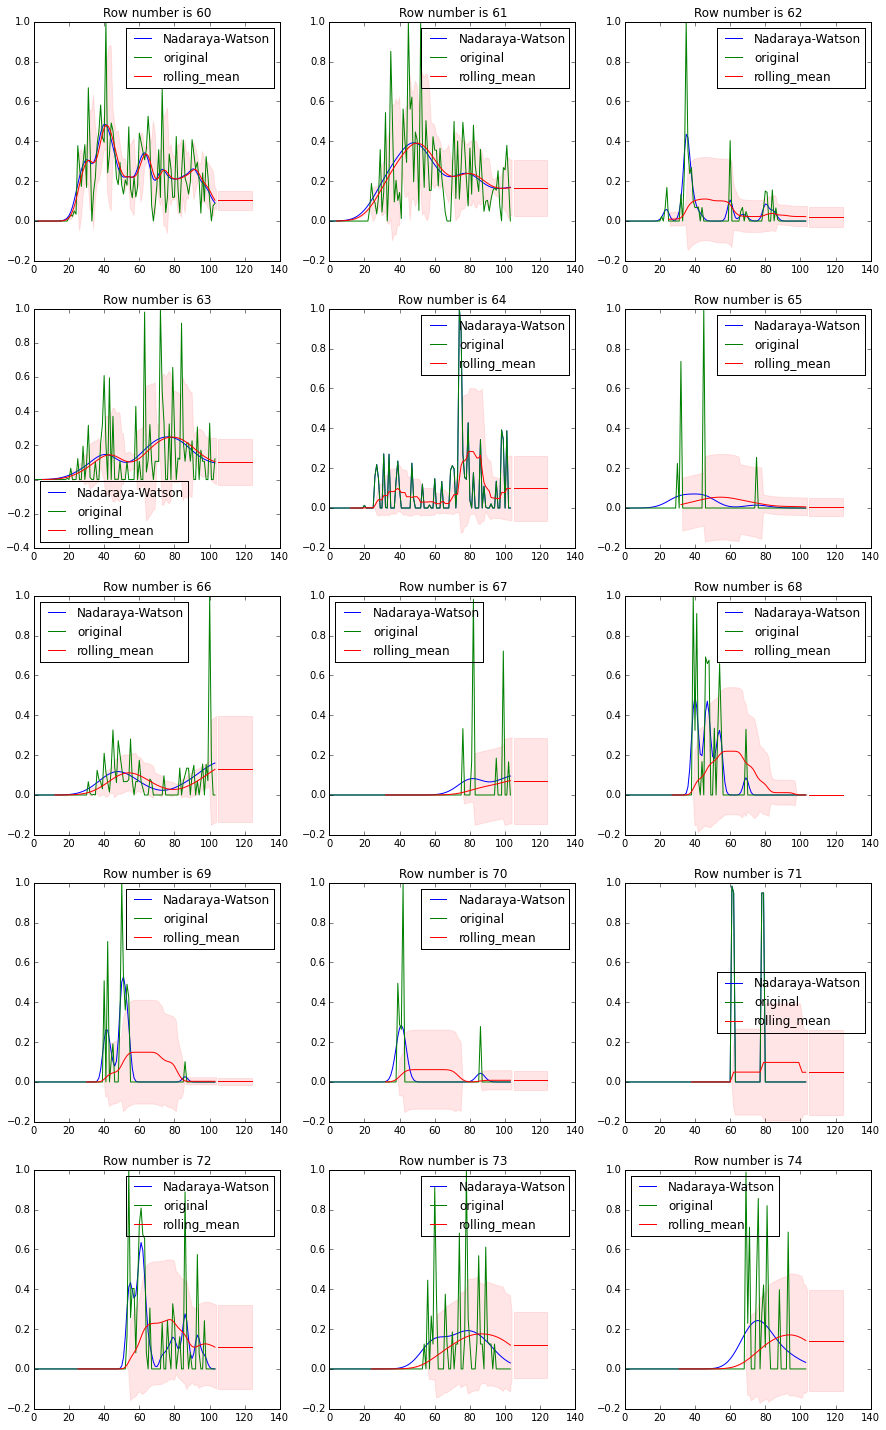

In [16]:
predictor.show_examples(start_row=60, end_row=75)

In [17]:
#The following methon contains all predicted curves.
#y - the original time series
#y_kr - kernel regression curve (Nadaraya-Watson smoothing)
#y_out - rolling mean values curve
#y_std - rolling standart deviation values curve. 

#predictor.predicted_curves[0]['y_kr']

###Popularity and Predicted Accesses correlations

The following histogramms shows, that datasets popularities and predicted accesses are hightly correlated.

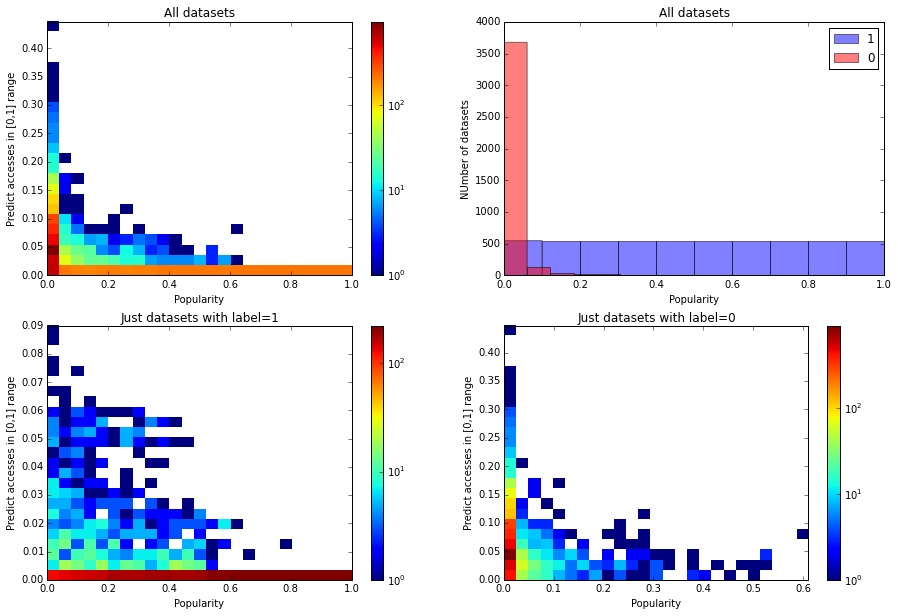

In [18]:
from matplotlib.colors import LogNorm
label = estimator.train_report.sort(columns='Name')['Label'].values
pred = prediction.sort(columns='Name')['Intensity'].values
pop = popularity.sort(columns='Name')['Popularity'].values
#pop = estimator.train_report.sort(columns='Name')['Probability']

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.hist2d(pop, pred, norm=LogNorm(), bins=25)
plt.colorbar()
plt.xlabel('Popularity')
plt.ylabel('Predict accesses in [0,1] range')
plt.title('All datasets')

plt.subplot(222)
plt.hist(pop[label==1], color='b', alpha=0.5, label='1')
plt.hist(pop[label==0], color='r', alpha=0.5, label='0')
plt.legend(loc='best')
plt.xlabel('Popularity')
plt.ylabel('NUmber of datasets')
plt.title('All datasets')

plt.subplot(223)
plt.hist2d(pop[label==1], pred[label==1], norm=LogNorm(), bins=25)
plt.colorbar()
plt.xlabel('Popularity')
plt.ylabel('Predict accesses in [0,1] range')
plt.title('Just datasets with label=1')

plt.subplot(224)
plt.hist2d(pop[label==0], pred[label==0], norm=LogNorm(), bins=25)
plt.colorbar()
plt.xlabel('Popularity')
plt.ylabel('Predict accesses in [0,1] range')
plt.title('Just datasets with label=0')

#DataPlacementOptimizer

DataPlacementOptimizer takes reports of DataPopularityEstimator and DataIntensityPredictor to minimize loss function.

###Reports preparation

In [3]:
from datapop import DataPopularityEstimator
from datapop import DataIntensityPredictor

In [4]:
estimator_opti = DataPopularityEstimator(data=data, nb_of_weeks=104)
estimator_opti.train()
predictor_opti = DataIntensityPredictor(data=data, nb_of_weeks=104)

popularity_report = estimator_opti.get_popularity()
prediction_report = predictor_opti.predict(zero_one_scale=False)

KFold prediction using folds column


###Get optimal data sets storege placement

In [5]:
from datapop import DataPlacementOptimizer

optimizer = DataPlacementOptimizer(popularity_report, prediction_report, data)

In [6]:
opti_report = optimizer.opti_placement(q=None, set_replicas='auto', c_disk=100, c_tape=1, c_miss=3000, alpha=1, min_replicas=1, max_replicas=4)

In [7]:
opti_report.irow(range(5))

,Name,OnDisk,NbReplicas
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1,3
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1,4
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,1
7170,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,1
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1,1


###Plot loss function

Min point is  (0.46000000000000002, 883105.8773273913)


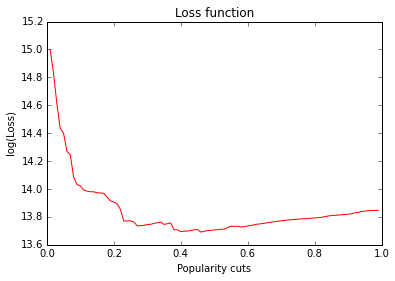

1

In [8]:
optimizer.plot_loss_curve(q=None, set_replicas='origin', c_disk=100, c_tape=1, c_miss=3000, alpha=0, min_replicas=1, max_replicas=4)

###Get distribution of number of replicas on disk

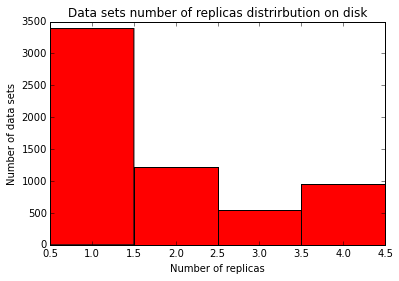

55.49009982 %  1 replicas
19.882179676 %  1 replicas
8.91834396989 %  1 replicas
15.7093765341 %  1 replicas


In [9]:
max_replicas = 4
nb_rep = opti_report.NbReplicas[opti_report.OnDisk==1].values
plt.hist(nb_rep, bins=[i+0.5 for i in range(max_replicas+1)])
plt.xlabel('Number of replicas')
plt.ylabel('Number of data sets')
plt.title('Data sets number of replicas distrirbution on disk')
plt.show()
print len(nb_rep[nb_rep==1])/float(len(nb_rep))*100, '%', ' 1 replicas'
print len(nb_rep[nb_rep==2])/float(len(nb_rep))*100, '%', ' 1 replicas'
print len(nb_rep[nb_rep==3])/float(len(nb_rep))*100, '%', ' 1 replicas'
print len(nb_rep[nb_rep==4])/float(len(nb_rep))*100, '%', ' 1 replicas'

###Saving space

In [10]:
total_size_on_disk_before = (data['DiskSize'].values).sum()
total_size_on_disk_after = optimizer.opti_total_size(opti_report)

saving_space = total_size_on_disk_before - total_size_on_disk_after
print 'Total size before = ', total_size_on_disk_before, ' Gb'
print 'Total size after = ', total_size_on_disk_after, ' Gb'
print '___________________'
print 'Saving space = ', saving_space, ' Gb'

Total size before =  10322.03755  Gb
Total size after =  8182.514965  Gb
___________________
Saving space =  2139.522585  Gb


#Performance

In [11]:
from datapop import Performance
performance = Performance(data, popularity_report=popularity_report, prediction_report=prediction_report, report=opti_report)
performance.get_performance_report(t_disk=0.1, t_tape=3, const_tape=24)

,Downloading_time_ratio (train),Saving_space_(%) (train),Nb_of_mistakes (train)
0,0.956537,20.682769,12


#Filters

The Filter takes popularity_report, prediction_report, opti_report, data as inputs. 

'Base' mode means that the unpopular (according to opti_report) will removed from disk.

'Save' mode means that the unpopular (according to opti_report) will had just one replica on disk.

In [12]:
from datapop import Filters
f = Filters(popularity_report, prediction_report, opti_report, data)
r, s = f.SaveNTB(N=3000, mode='base')

How much space was saved (Sometimes it is impossible to get N Tb of free disk space safely.)

In [13]:
s

3000.1536127430713

What ToDo to save N Tb.

'LFNSize' - size of one replica.

'Opti_NbReplicas' - optimal number of replicas according to opti_report.

'Current_NbReplicas' - original number of replicas.

'ToDo' - how much replicas should be removed from disk.

In [14]:
r.irow(range(0,5))

,Name,LFNSize,Opti_NbReplicas,Current_NbReplicas,ToDo
2901,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.317900,3,2.000000,0.000000
3973,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.649204,4,4.317181,0.000000
6364,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1.370105,0,1.000000,-1.000000
7456,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.095290,0,4.276316,-4.276316
1363,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.803981,1,4.328125,-2.000000
